<a href="https://colab.research.google.com/github/Shujah-Butt/Freelancing-Projects/blob/main/Task_7_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 7: Sales Forecasting

**Objective:** Predict future sales based on historical Walmart sales data.

**Dataset:** [Walmart Sales Forecast (Kaggle)][https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores]

**Tools:** Python, Pandas, Matplotlib, Scikit-learn, XGBoost, LightGBM

**Steps:**
1. Load and explore dataset
2. Feature engineering (time-based, lag, rolling averages)
3. Train/test split with time-series awareness
4. Baseline regression model
5. Bonus: Rolling averages, seasonal decomposition, advanced models


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Step 2: Load dataset
# Replace filename with actual Walmart sales dataset from Kaggle
df = pd.read_csv('/content/sample_data/walmart_sales.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


In [6]:
# Step 3: Feature engineering
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek

# Lag features
df['lag_1'] = df['Weekly_Sales'].shift(1)
df['lag_7'] = df['Weekly_Sales'].shift(7)
df['rolling_mean_7'] = df['Weekly_Sales'].rolling(window=7).mean()
df.dropna(inplace=True)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,dayofweek,lag_1,lag_7,rolling_mean_7
3146,23,2010-02-05,1364721.58,0,15.25,2.788,131.527903,5.892,5,2,2010,4,1033017.37,1643690.90,1.008310e+06
3289,24,2010-02-05,1388725.63,0,22.43,2.954,131.527903,8.326,5,2,2010,4,1364721.58,2193048.75,8.934068e+05
2574,19,2010-02-05,1507637.17,0,20.96,2.954,131.527903,8.350,5,2,2010,4,1388725.63,536006.73,1.032211e+06
2860,21,2010-02-05,798593.88,0,39.05,2.572,210.752605,8.324,5,2,2010,4,1507637.17,789036.02,1.033577e+06
3575,26,2010-02-05,1034119.21,0,9.55,2.788,131.527903,8.488,5,2,2010,4,798593.88,465108.52,1.114864e+06


In [7]:
# Step 4: Prepare features and target
X = df[['day', 'month', 'year', 'dayofweek', 'lag_1', 'lag_7', 'rolling_mean_7']]
y = df['Weekly_Sales']

In [8]:
# Step 5: TimeSeriesSplit for train/test
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


R2 Score: 0.15362707261916142
RMSE: 491475.81405444


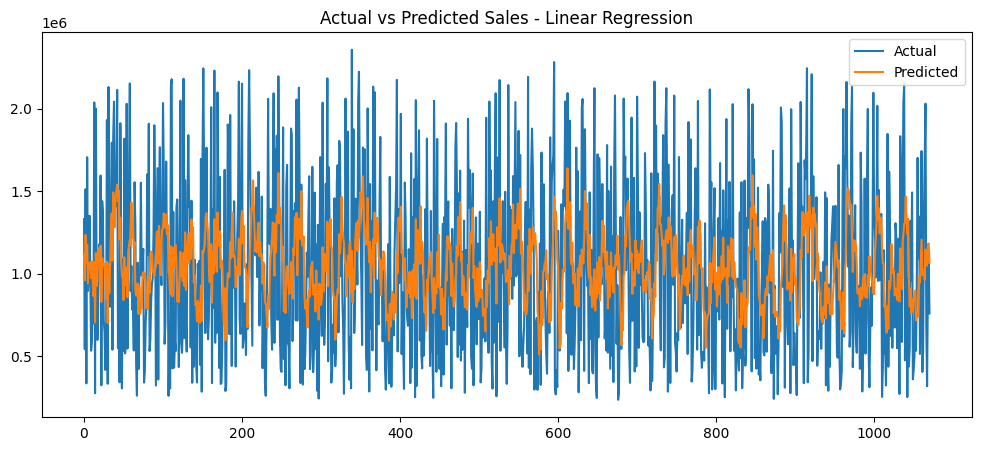

In [9]:
# Step 6: Train baseline Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Sales - Linear Regression')
plt.show()

## 🔍 Bonus: Advanced Models
- Rolling averages already included as features
- Seasonal decomposition for trend/seasonality
- XGBoost / LightGBM for stronger performance

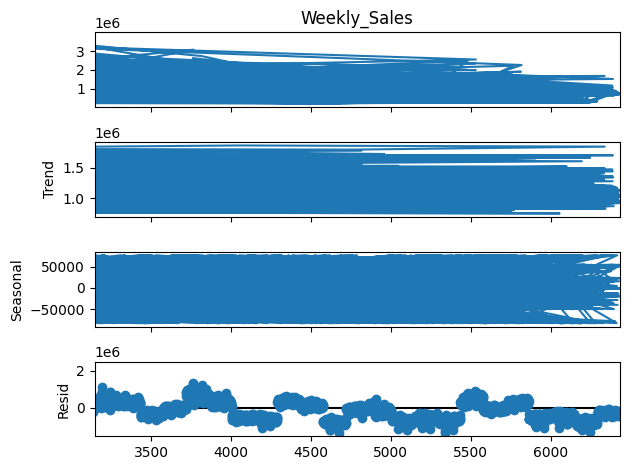

In [11]:
# Bonus: Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Weekly_Sales'], model='additive', period=30)
result.plot()
plt.show()

XGBoost R2: 0.015006141973011422
XGBoost RMSE: 530197.9329761836


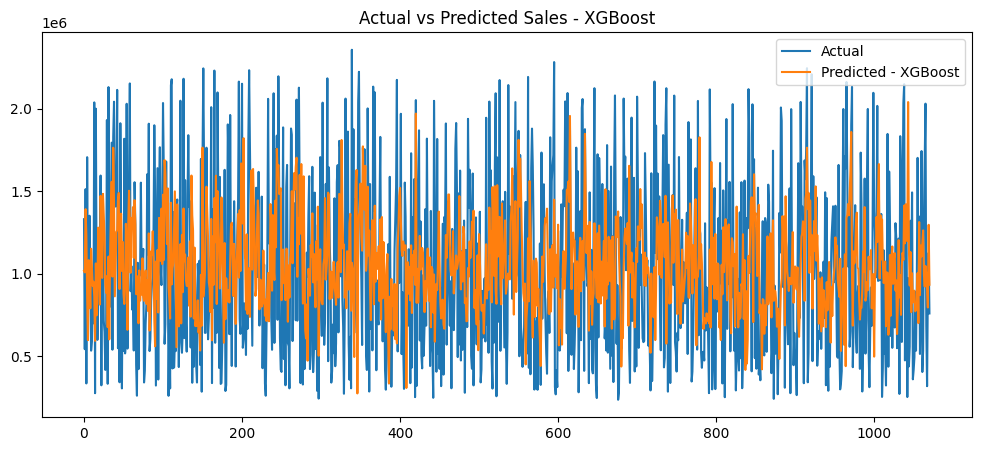

In [12]:
# Bonus: XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost R2:', r2_score(y_test, y_pred_xgb))
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xgb, label='Predicted - XGBoost')
plt.legend()
plt.title('Actual vs Predicted Sales - XGBoost')
plt.show()